In [132]:
# Import libraries 
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import string

In [34]:
# Import CSV Data Set(s)
fatal_crashes = pd.read_csv('fatalcrashesdecember2017.csv')
fatalities = pd.read_csv('fatalitiesdecember2017.csv')

In [35]:
# Define Australian States and Territories
states_and_territories = {'QLD': 'Queensland', 'WA': 'Western Australia', 'NSW': 'New South Wales', 'SA': 'South Australia',
                         'VIC': 'Victoria', 'TAS': 'Tasmania'}

In [36]:
# Define Months
months = {'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', '7': 'July', '8': 'August', '9': 'September',
         '10': 'October', '11': 'November', '12': 'December'}

In [54]:
# Tally up number of fatal crashes per year
fatal_crashes_by_year = defaultdict(int)
for i in fatal_crashes.Year:
    fatal_crashes_by_year[i] += fatal_crashes.Number_of_Fatalities.loc[i]

In [119]:
# Tally up number of road deaths
fatalities_by_year = defaultdict(int)
for i in fatalities.Year:
    fatalities_by_year[i] += 1

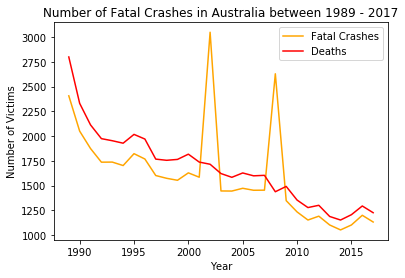

We can see the general trend decreases over time with the lowest recorded number of fatal crashes and road deaths in the year 2014


In [239]:
# Plot between Fatal Crashes against Road Deaths
plt.clf()

plt.plot(fatal_crashes_by_year.keys(),fatal_crashes_by_year.values(), c = 'orange')
plt.plot(fatalities_by_year.keys(), fatalities_by_year.values(), c = 'red')

plt.title('Number of Fatal Crashes in Australia between 1989 - 2017')
plt.legend(('Fatal Crashes', 'Deaths'))
plt.ylabel('Number of Victims')
plt.xlabel('Year')

plt.show()

print('We can see the general trend decreases over time with the lowest recorded number of fatal crashes and road deaths in the year 2014')

In [228]:
# Tally of valid fatal crashes according to the speed limit
speed_limits = defaultdict(int)
for i in fatal_crashes.Speed_Limit:
    try:
        if i == ' ':
            pass
        if int(i) <= 130 and bool(i.endswith('0') or i.endswith('5')):
            speed_limits[int(i)] += 1
    except:
        pass

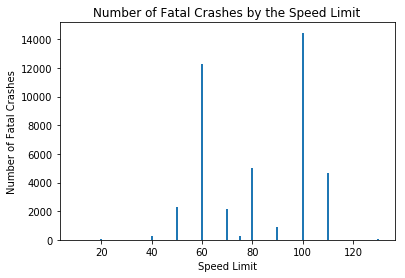

We can see that the most crashes occur at 100km/hr, 60km/hr and 80km/hr


In [233]:
# Plot between the number of fatal crashes against speed limits
plt.clf()

plt.bar(speed_limits.keys(), speed_limits.values())

plt.title('Number of Fatal Crashes by the Speed Limit')
plt.ylabel('Number of Fatal Crashes')
plt.xlabel('Speed Limit')

plt.show()
print('We can see that the most crashes occur at 100km/hr, 60km/hr and 80km/hr')